In [109]:
import numpy as np

from sklearn import datasets
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
digits = datasets.load_digits()

In [3]:
X = digits.data
y = digits.target

In [4]:
X.shape, y.shape

((1797, 64), (1797,))

### Задание 1
Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [5]:
tree = DecisionTreeClassifier()

In [6]:
score = np.mean(cross_val_score(tree, X, y, cv=10))
print(score)

0.8297478814676188


In [7]:
with open("ans1.txt", "w") as fout:
    fout.write(str(score))

### Задание 2
Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [8]:
bag = BaggingClassifier(n_estimators=100)

In [9]:
score = np.mean(cross_val_score(bag, X, y, cv=10))
print(score)

0.9221338800070613


In [10]:
with open("ans2.txt", "w") as fout:
    fout.write(str(score))

### Задание 3
Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на $\sqrt{d}$ случайных признаков.<br>
Качество работы получившегося классификатора - ответ в пункте 3. <br>
Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [30]:
max_features = int(np.sqrt(X.shape[1]))
bag = BaggingClassifier(n_estimators=100, max_features=int(max_features))

In [31]:
score = np.mean(cross_val_score(bag, X, y, cv=10))
print(score)

0.9299818819483836


In [32]:
with open("ans3.txt", "w") as fout:
    fout.write(str(score))

### Задание 4
Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt{d}$ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [83]:
tree = DecisionTreeClassifier(max_features=max_features)
bag = BaggingClassifier(base_estimator=tree, bootstrap=False)

In [84]:
score = np.mean(cross_val_score(bag, X, y, cv=10))
print(score)

0.9421705799827647


In [85]:
with open("ans4.txt", "w") as fout:
    fout.write(str(score))

### Задание 5
Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев

2) **При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев**

3) **С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.**

4) **При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.**

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

7) **При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).**

In [104]:
rf = RandomForestClassifier(max_features=max_features, bootstrap=False)

In [105]:
score = np.mean(cross_val_score(rf, X, y, cv=10))
print(score)

0.9260314068676673


In [114]:
scores = []
n_estimators = list(range(5, 100, 5))
for i in n_estimators:
    rf = RandomForestClassifier(max_features=max_features, n_estimators = i, bootstrap=False)
    score = np.mean(cross_val_score(rf, X, y, cv=10))
    scores.append(score)
    print('n_estimators: {}\tscore: {} '.format(i, score))

n_estimators: 5	score: 0.8943993385457969 
n_estimators: 10	score: 0.9272331881214319 
n_estimators: 15	score: 0.9351584232497284 
n_estimators: 20	score: 0.9516790274774521 
n_estimators: 25	score: 0.9500424972452635 
n_estimators: 30	score: 0.9505369666514994 
n_estimators: 35	score: 0.95276517524235 
n_estimators: 40	score: 0.9550534342126664 
n_estimators: 45	score: 0.9550033366513064 
n_estimators: 50	score: 0.9523006580976782 
n_estimators: 55	score: 0.9556435509284688 
n_estimators: 60	score: 0.9555712313284243 
n_estimators: 65	score: 0.9589010291319541 
n_estimators: 70	score: 0.9566522129435586 
n_estimators: 75	score: 0.9572161763942841 
n_estimators: 80	score: 0.9550153514658326 
n_estimators: 85	score: 0.9555090476449853 
n_estimators: 90	score: 0.9545148596492978 
n_estimators: 95	score: 0.9549897666548339 


In [ ]:
plt.plot(n_estimators, scores)
plt.xlabel('trees');

In [116]:
scores = []
max_features = list(range(5, 60, 5))
for i in max_features:
    rf = RandomForestClassifier(max_features=i, n_estimators = 100, bootstrap=False)
    score = np.mean(cross_val_score(rf, X, y, cv=10))
    scores.append(score)
    print('max_features: {}\tscore: {} '.format(i, score))

max_features: 5	score: 0.9561930375203198 
max_features: 10	score: 0.9527897477433422 
max_features: 15	score: 0.952258386202763 
max_features: 20	score: 0.952255072700656 
max_features: 25	score: 0.9516387249645343 
max_features: 30	score: 0.944414398192355 
max_features: 35	score: 0.9438920016472856 
max_features: 40	score: 0.9354616154754625 
max_features: 45	score: 0.9254746753358866 
max_features: 50	score: 0.9048809245194775 
max_features: 55	score: 0.8775750714875056 


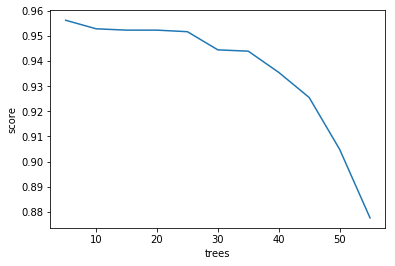

In [117]:
plt.plot(max_features, scores)
plt.xlabel('trees')
plt.ylabel('score');

In [119]:
rf = RandomForestClassifier(max_depth=6, max_features=8, bootstrap=False)
np.mean(cross_val_score(rf, X, y, cv=10))

0.8954349917492616

In [122]:
rf = RandomForestClassifier(max_depth=None, max_features=8, bootstrap=False)
np.mean(cross_val_score(rf, X, y, cv=10))

0.9332649788248574

In [123]:
with open("ans5.txt", "w") as fout:
    fout.write('2 3 4 7')